In [0]:
import pandas as pd
import numpy as np
import codecs
import re
from os import path, listdir
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/tpa/'
monolith_dir = path.join(pwd, 'monolith')
monolith = path.join(monolith_dir, 'final_tweets.csv')

In [4]:
root = pd.read_csv(monolith, dtype={'tweet_id': str})

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
root = root.dropna()
print(root.shape)
print(root.dtypes)

(85632, 16)
tweet_text                    object
tweet_id                      object
user_name                     object
user_screen_name              object
user_location                 object
user_description              object
user_follower_count           object
user_friends_count            object
user_listed_count             object
user_statuses_count           object
user_favourites_count         object
user_verified                 object
user_default_profile_image    object
user_default_profile          object
user_protected                object
user_created_at               object
dtype: object


In [6]:
# find users

users = {}

for _, row in root.iterrows():
  un = str(row['user_screen_name'])
  if un in users:
    # append tweet to user object
    users[un]['tweets'].append({row['tweet_id']: row['tweet_text']})
  else:
    users[un] = {}
    users[un] = {k: row[k] for k in [
        'user_name', 'user_screen_name', 'user_location',
        'user_description', 'user_follower_count', 'user_friends_count',
        'user_listed_count', 'user_statuses_count', 'user_favourites_count',
        'user_verified', 'user_default_profile_image', 'user_default_profile',
        'user_protected', 'user_created_at']}
    users[un]['tweets'] = [{row['tweet_id']: row['tweet_text']}]
    users[un]['bot'] = False

print('Unique users', len(users))

Unique users 46496


In [7]:
print(list(users.values())[0])

{'user_name': 'DEVENDRA PRATAP SINGH', 'user_screen_name': 'FearlessDPSingh', 'user_location': 'INDIA', 'user_description': "Humanitarian| Thinker| Writer| Spiritual | IndiaDilse | Father | RAJPUT ||ॐ||🇮🇳Freedom is not worth having, if it doesn't include freedom to make mistakes..!!", 'user_follower_count': '2744', 'user_friends_count': '3102', 'user_listed_count': '11', 'user_statuses_count': '8773', 'user_favourites_count': '3985', 'user_verified': False, 'user_default_profile_image': False, 'user_default_profile': False, 'user_protected': False, 'user_created_at': '2009-12-31 14:16:45', 'tweets': [{'1206838098513911808': 'RT @FearlessDPSingh: अगर #यूनिवर्सिटी के अंदर #सुरक्षाकर्मी बिना इज़ाज़त नहीं घुस सकते, तो #देश के अंदर कोई भी घुस जाए ये हम कैसे बरदाश्त…'}, {'1206821406010302464': 'अगर #यूनिवर्सिटी के अंदर #सुरक्षाकर्मी बिना इज़ाज़त नहीं घुस सकते, तो #देश के अंदर कोई भी घुस जाए ये हम कैसे बरदा… https://t.co/yfMrpHyIF2'}, {'1219165670148956161': 'What does it mean? Does it mean s

In [8]:
# find descs

descs = {}

for row in users.values():
  un = str(row['user_description']).lower()
  if un in descs:
    descs[un] = descs[un] + 1
  else:
    descs[un] = 1

print('Unique descriptions')

for l in sorted(zip(descs.keys(), descs.values()), key=lambda t: t[1], reverse=True)[:20]:
  print(l)

Unique descriptions
('indian', 97)
('student', 86)
('journalist', 41)
('🇮🇳', 28)
('.', 26)
('male', 24)
('social worker', 18)
('civil engineer', 17)
('proud indian', 16)
('mechanical engineer', 16)
('jai hind', 13)
('social activist', 13)
('engineer', 12)
('nationalist', 12)
('software engineer', 12)
('i love my india', 12)
('indian🇮🇳', 11)
('nation first', 11)
('entrepreneur', 10)
('जय श्री राम', 10)


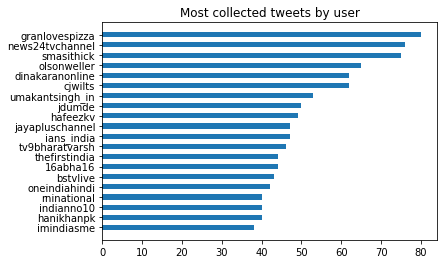

In [9]:
# find most active users

active_users = {}

for user in users.values():
  un = str(user['user_screen_name']).lower()
  active_users[un] = {'tweets': len(user['tweets']), 'statuses': row['user_statuses_count'] if str(row['user_statuses_count']).isdigit() else 0}

# print('Most tweets by users', len(active_users))
# for l in sorted(zip(active_users.keys(), active_users.values()), key=lambda t: t[1]['tweets'], reverse=True)[:20]:
#   print(l)
top_20 = reversed(sorted(active_users.items(), key=lambda t: t[1]['tweets'], reverse=True)[:20])
plt.barh(*zip(*list(map(lambda t:(t[0], t[1]['tweets']), top_20))), height=0.5)
plt.title('Most collected tweets by user')
plt.show()

In [10]:
# self identified bots

for un, user in users.items():
  un = un.lower()
  desc = user['user_description'].lower()
  name = user['user_name'].lower()
  if un.startswith('bot') or un.endswith('bot'):
    print(un)
    continue
  # if re.compile('((^bot\s+)|(\s+bot\s+)|(\s+bot$))').match(desc):
  #   print(un)
  #   continue
  # if re.compile('((^bot\s+)|(\s+bot\s+)|(\s+bot$))').match(name):
  #   print(un)
  #   continue

botanist77
indianaimbot
bot8point2
larryheatherbot
gyuslovebot
bothrapawan53
ex0bot
humaibot
nypdbot
twelvebot
weebsyntaxbot


In [11]:
# all users within 1 year of creation date and tweets per day

from datetime import datetime
now = datetime.strptime('2020-03-01 00:00:00', '%Y-%m-%d %H:%M:%S')
# now = datetime.now()

print(now)

relatively_new_users = []

for user in users.values():
  acct_creation_time = datetime.strptime(user['user_created_at'], '%Y-%m-%d %H:%M:%S')
  if acct_creation_time > datetime(2019, 1, 1):
    tweets_per_day = int(user['user_statuses_count']) / (now - acct_creation_time).days
    if tweets_per_day > 100:
      # print(user['user_screen_name'], tweets_per_day)
      relatively_new_users.append((user['user_screen_name'], tweets_per_day))

print('Relatively new users count:', len(relatively_new_users))
print('Average tweet count of new users:',
      sum(map(lambda t:t[1], relatively_new_users)) / len(relatively_new_users))

2020-03-01 00:00:00
Relatively new users count: 343
Average tweet count of new users: 172.09427937143192


In [0]:
# users with very poor ratio of (friends / followers) count

users_poor_ratio = []

for un, user in users.items():
  followers = int(user['user_follower_count'])
  friends = int(user['user_friends_count']) or 1
  ratio = followers / friends

  # Friends >5000 is too obvious
  # Ratio >0.85 is too close to close friends and followers

  if friends > 5000 and ratio > 0.85 and not user['verified']:
    # print(followers, friends, un)
    users_poor_ratio.append(un)
  # print(ratio, followers, friends)

print(len(users_poor_ratio))

1064


In [0]:
# average retweets by users with poor follower/friend ratio

rt_count_by_user = [
  len(list(filter(lambda s: s.values() and str(list(s.values())[0]).startswith('RT '), user['tweets'])))
  for user in list(map(lambda un:users.get(un), users_poor_ratio))
]

print(sum(rt_count_by_user) / len(rt_count_by_user))

0.08082706766917293


In [0]:
# find RTs

RTs = []

for _, row in root.iterrows():
  text = str(row['tweet_text'])
  if text.startswith('RT '):
    RTs.append(row['tweet_id'])

print('Total RTs', len(RTs), len(root))

Total RTs 2786 85632


In [128]:
# start flagging

bots = set()
not_bots = set()

for un, user in users.items():
  # bot in name
  if un.startswith('bot') or un.endswith('bot'):
    bots.add(un)

  # ton of tweets per day (upto Mar 1 2020)
  acct_creation_time = datetime.strptime(user['user_created_at'], '%Y-%m-%d %H:%M:%S')
  days = (datetime(2020, 3, 1) - acct_creation_time).days or 1
  tweets_per_day = int(user['user_statuses_count']) / days
  favorites_per_day = int(user['user_favourites_count']) / days

  if tweets_per_day > 150 and (user['user_default_profile_image'] or user['user_default_profile'] or not user['user_verified']):
    bots.add(un)

  # user with very poor ratio of (followers / friends) count
  followers = int(user['user_follower_count'])
  friends = int(user['user_friends_count']) or 1
  ratio = followers / friends
  if friends > 5000 and ratio > 0.85 and tweets_per_day > 50 and not user['user_verified']:
    bots.add(un)
  
  if followers > 10000 and not user['user_verified'] and (favorites_per_day > 300 or favorites_count > 50):
    bots.add(un)

  # young users with poor ratio of (followers / friends) count (6 months)
  if acct_creation_time > datetime(2019, 6, 1):
    if friends > 500 and ratio > 0.85 and tweets_per_day > 10:
      bots.add(un) # poor ratio

  if followers > 3000 and friends_count < 50 and tweets_per_day > 30 and acct_age < 1000:
    bots.add(un)

  if un not in bots:
    not_bots.add(un)
print(len(bots))
print(list(bots)[-10:])

2292
['Dhoomanfathan', 'NKeal1', 'SriRahasya', 'Sarah_Ali_KHAN', 'Cigarvolante', 'ModernShakti', 'MukeshFirst', 'zeeq_ch', 'SANGHI_SANATANI', 'Bilalturki007']


In [81]:
# average retweets by bots and notbots

rt_count_by_bot_user = [
  len(list(filter(lambda s: s.values() and str(list(s.values())[0]).startswith('RT '), user['tweets'])))
  for user in list(map(lambda un:users.get(un), bots))
]

rt_count_by_notbot_user = [
  len(list(filter(lambda s: s.values() and str(list(s.values())[0]).startswith('RT '), user['tweets'])))
  for user in list(map(lambda un:users.get(un), not_bots))
]

print(sum(rt_count_by_bot_user) / len(rt_count_by_bot_user))
print(sum(rt_count_by_notbot_user) / len(rt_count_by_notbot_user))

0.17879858657243816
0.05618775093720193


In [82]:
# average status counts by bots and notbots

status_count_by_bot_user = [
  int(user['user_statuses_count'])
  for user in list(map(lambda un:users.get(un), bots))
]

status_count_by_notbot_user = [
  int(user['user_statuses_count'])
  for user in list(map(lambda un:users.get(un), not_bots))
]

total_status_count = sum(status_count_by_bot_user) + sum(status_count_by_notbot_user)
print(sum(status_count_by_bot_user) / len(bots), '-', len(bots), sum(status_count_by_bot_user) / total_status_count * 100, '%')
print(sum(status_count_by_notbot_user) / len(not_bots), '-', len(not_bots), sum(status_count_by_notbot_user) / total_status_count * 100, '%')

115172.8664310954 - 1415 21.382223282505958 %
13291.71351567179 - 45081 78.61777671749404 %


In [83]:
# check min and max followers

min_followers = 2**32
max_followers = -min_followers
min_followers_user = ''
max_followers_user = ''

for user in users.values():
  followers = int(user['user_follower_count']) if str(user['user_follower_count']).isdigit() else 0
  if followers > max_followers:
    max_followers = followers
    max_followers_user = user['user_screen_name']

  if followers < min_followers:
    min_followers = followers
    min_followers_user = user['user_screen_name']

print(min_followers, min_followers_user)
print(max_followers, max_followers_user)

0 adnanHu06692398
45234397 nytimes


In [84]:
# favorite count based on bots and not bots

print(sum([
  int(user['user_favourites_count']) if str(user['user_favourites_count']).isdigit() else 0
  for user in map(lambda un:users.get(un), bots)
]))

print(sum([
  int(user['user_favourites_count']) if str(user['user_favourites_count']).isdigit() else 0
  for user in map(lambda un:users.get(un), not_bots)
]))

95640976
546686216


[44116, 2011, 306, 63]


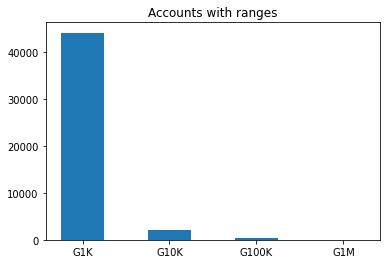

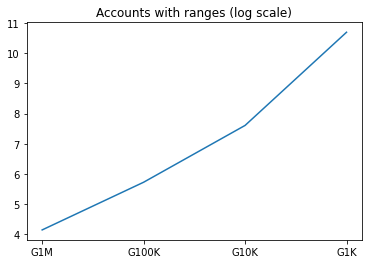

In [116]:
# Get users in ranges
# 0 to 10K - G1K
# 10K to 100K - G10K
# 100K to 1M - G100K
# 1M+ - G1M

G1K = []
G10K = []
G100K = []
G1M = []

for user in users.values():
  followers = int(user['user_follower_count']) if str(user['user_follower_count']).isdigit() else 0
  un = user['user_screen_name']
  if followers < 10000:
    G1K.append((un, followers))
  elif followers < 100000:
    G10K.append((un, followers))
  elif followers < 1000000:
    G100K.append((un, followers))
  else:
    G1M.append((un, followers))

ranges = ['G1K', 'G10K', 'G100K', 'G1M']
sizes = [len(G1K), len(G10K), len(G100K), len(G1M)]

# 46K users with < 100K folowers
# Got [46127, 306, 56, 7] for 'G1K', 'G100K', 'G1M', 'G10M'

# [44116, 2011, 306, 63] for 'G1K', 'G10K', 'G100K', 'G1M'

print(sizes)

plt.bar(np.arange(len(ranges)), sizes, width=0.5)
plt.xticks(np.arange(len(ranges)), ranges)
plt.title('Accounts with ranges')
plt.show()

plt.plot(np.arange(len(ranges)), list(reversed(list(map(np.log, sizes)))))
plt.xticks(np.arange(len(ranges)), list(reversed(ranges)))
plt.title('Accounts with ranges (log scale)')
plt.show()

[1392, 742, 124, 34]
[('priyashmita', 21341), ('deepsealioness', 28555), ('imtbahu', 12391), ('rubiaabrar', 22858), ('brajeshjee', 27235), ('mike9wood', 41481), ('BostonForTrump', 30847), ('INCTharoorian', 15669), ('MirrorNow', 73756), ('brecordernews', 33364), ('_dharam_vir', 22153), ('News18Guj', 69470), ('vaidehisachin', 16927), ('taexmiin', 12832), ('Mohtermalaila', 34553), ('_iamSA1', 19895), ('bstvlive', 90781), ('AshAgony', 12916), ('SunnyShines_', 22023), ('kgkiser2015', 10009), ('MiracleonIce191', 15724), ('AlamgirTheGreat', 12552), ('modified_dayalu', 18581), ('RASunartii', 20311), ('sujata_priyansi', 23062), ('PoliticalAnt', 16293), ('royalpatel47', 11732), ('jimdwrench', 22707), ('Z_P_Special', 14537), ('shivam0305', 24042), ('FortuneUSNews', 30401), ('jamewils', 40461), ('ColdCigar', 11562), ('JAMMULINKS', 18775), ('PplOfIndia', 22923), ('eeynouf', 44894), ('Saliltoday', 12251), ('Bhartiy_sannari', 30291), ('3roao111', 10900), ('SangbadPratidin', 10298), ('WashNewsLine', 1

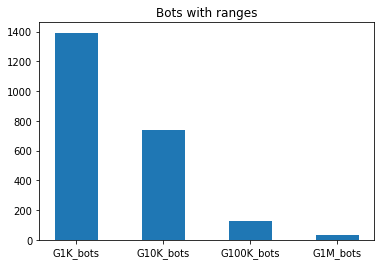

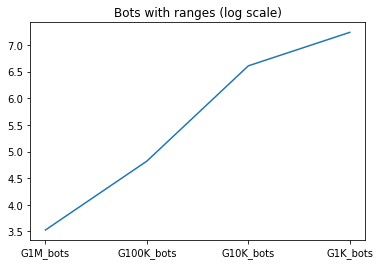

In [129]:
# Get bots and notbots in ranges
# 0 to 10K - G1K
# 10K to 100K - G10K
# 100K to 1M - G100K
# 1M+ - G1M

G1K_bots = []
G10K_bots = []
G100K_bots = []
G1M_bots = []

for bot in bots:
  user = users.get(bot)
  followers = int(user['user_follower_count']) if str(user['user_follower_count']).isdigit() else 0
  if followers < 10000:
    G1K_bots.append((bot, followers))
  elif followers < 100000:
    G10K_bots.append((bot, followers))
  elif followers < 1000000:
    G100K_bots.append((bot, followers))
  else:
    G1M_bots.append((bot, followers))

ranges = ['G1K_bots', 'G10K_bots', 'G100K_bots', 'G1M_bots']
sizes = [len(G1K_bots), len(G10K_bots), len(G100K_bots), len(G1M_bots)]

print(sizes)
print(G10K_bots)

plt.bar(np.arange(len(ranges)), sizes, width=0.5)
plt.xticks(np.arange(len(ranges)), ranges)
plt.title('Bots with ranges')
plt.show()

plt.plot(np.arange(len(ranges)), list(reversed(list(map(np.log, sizes)))))
plt.xticks(np.arange(len(ranges)), list(reversed(ranges)))
plt.title('Bots with ranges (log scale)')
plt.show()

In [87]:
# RT not endorsement text in user description
import re

endorse = re.compile('RT not endorsement', re.IGNORECASE)

rtne = [
  un for un in users.keys()
  if re.search(endorse, users.get(un)['user_description'])
]
print(len(rtne), rtne)

98 ['Virat_Hindu4', 'Omsharma8000', 'shahidalidar_', 'tiwari_ashish1', 'googlemyname4', 'mistbag', 'AStoryTeller14', 'Surjeet404', 'oldhandhyd', 'DocDiv17', 'MevMisbah', 'sir_jenishpatel', 'srishtishorya', 'subhashpathak', 'SarthakJain_BJP', 'JumbuTweeple', 'IamTejas07', '108Iamthat', 'JitendraBaghel_', 'itashuofficial', 'MadhupKr', 'AneeshSingh793', 'raisina4', 'IManojRathore', 'iamsahjee', 'jagan601', 'iam_manojgoenka', 'AJAYKUPAL', 'GoswamiASandee1', 'Rathinder', 'ppranava9', 'AdvAshwaniDubey', 'iPoojaGoswami', 'singhkingjit', 'makeperceptions', 'PawanPr74907961', 'desh_pt', 'beg_ilyas', 'ashraf4916', 'santwana99', 'DineshMendiratt', 'carolkrish', 'dineshipu', 'KirtiAzaad', 'Punitspeaks', 'RossAddison56', 'lettywho1', 'sak_khan_sak', 'JK247News', 'SaniaAhmad1111', 'KT62779984', 'omersajj', 'khalidjavedkh', 'SanjayBragta', 'vandema09287787', 'nppassociates', 'dineshmittal3', 'Richasad2', 'jade_nyc', 'SumonaChakrabo8', 'Mohit_journo', 'rkdevar', 'Urbanbharat', 'profhuq', 'Aliciamburro

In [130]:
# Save to file, final attributes
# Final attributes
#   screen_name - just for debugging, ignore in final
#   acct_age
#   follower_count
#   friends_count
#   statuses_count
#   favorites_count
#   avg_status_count
#   verified_acct
#   default_image
#   default_profile
#   rel_new_acct
#   isbot

from os import path
import csv

header = [
  'screen_name', 'acct_age', 'follower_count', 'friends_count', 'statuses_count',
  'favorites_count', 'avg_status_count', 'verified_acct', 'default_image',
  'default_profile', 'rel_new_acct', 'isbot'
]

final_users = []

young_date = datetime(2019, 6, 1)

pwd = '/content/drive/My Drive/Colab Notebooks/tpa/'
features_file = path.join(pwd, 'monolith', 'features.csv')

with open(features_file, 'w', newline='\n', encoding='utf-8') as f:
  writer = csv.writer(f)

  # write header
  writer.writerow(header)

  def todigit(st):
    return int(st) if str(st).isdigit() else 0

  for user in users.values():
    acct_creation_time = datetime.strptime(user['user_created_at'], '%Y-%m-%d %H:%M:%S')

    screen_name = user['user_screen_name']
    tweets = user['tweets']
    follower_count = todigit(user['user_follower_count'])
    friends_count = todigit(user['user_friends_count'])
    statuses_count = todigit(user['user_statuses_count'])
    favorites_count = todigit(user['user_favourites_count'])
    acct_age = (datetime(2020, 3, 1) - acct_creation_time).days
    tweets_per_day = int(user['user_statuses_count']) / acct_age

    new_user = {
      'screen_name': screen_name,
      'acct_age': acct_age,
      'follower_count': follower_count,
      'friends_count': friends_count,
      'statuses_count': statuses_count,
      'favorites_count': favorites_count,
      'avg_status_count': tweets_per_day,
      'verified_acct': 1 if user['user_verified'] else 0,
      'default_image': 1 if user['user_default_profile_image'] else 0,
      'default_profile': 1 if user['user_default_profile'] else 0,
      'rel_new_acct': 1 if acct_creation_time > young_date else 0,
      'isbot': 1 if user['user_screen_name'] in bots else 0
    }

    # write features
    writer.writerow(list(new_user.values()))

print('Done writing features')

Done writing features
